# Machine Learning: Lab 2 – Linear and Logistic Regression

# Importing Data:

1. Randomly shuffle the dataset by taking a random seed of “42”. Create a testing set from the last 1000 
rows of the dataframe (these must be the same for all the students). The remaining rows will be the 
training + validation set, with training : validation ratio of 80% : 20%. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [4]:
houserent_df = pd.read_csv("House_Rent_Dataset.csv")
houserent_df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [5]:
houserent_df_shuffled = houserent_df.sample(frac=1,random_state=42) 
houserent_df_shuffled

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1566,2022-06-23,2,16000,1100,2 out of 4,Super Area,"Jaya Nagar Block 7, Jayanagar",Bangalore,Unfurnished,Bachelors/Family,2,Contact Owner
3159,2022-05-12,2,12000,800,2 out of 3,Super Area,Manikandan Nagar,Chennai,Furnished,Bachelors/Family,2,Contact Owner
538,2022-05-10,2,28000,518,5 out of 12,Carpet Area,Bhandup West,Mumbai,Semi-Furnished,Bachelors/Family,2,Contact Owner
2630,2022-06-08,3,8000,1500,1 out of 1,Carpet Area,Cherlopalli TIRUPATI,Delhi,Unfurnished,Bachelors/Family,3,Contact Owner
4418,2022-07-06,3,46000,2235,Ground out of 10,Carpet Area,Gachibowli,Hyderabad,Unfurnished,Family,5,Contact Agent
...,...,...,...,...,...,...,...,...,...,...,...,...
4426,2022-06-29,3,25000,1500,1 out of 2,Carpet Area,"Ayodhya Nagar, Quthbullapur",Hyderabad,Semi-Furnished,Family,3,Contact Owner
466,2022-06-13,3,20000,1200,3 out of 3,Super Area,Bansdroni,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
3092,2022-07-06,2,20000,800,13 out of 17,Carpet Area,Vadapalani,Chennai,Semi-Furnished,Family,2,Contact Agent
3772,2022-05-17,3,85000,3500,Ground out of 1,Carpet Area,T Nagar,Chennai,Semi-Furnished,Bachelors/Family,3,Contact Agent


In [6]:
testing_set = houserent_df_shuffled.tail(1000)
testing_set

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
2467,2022-05-06,3,40000,1650,1 out of 3,Carpet Area,Dakshini Pitampura,Delhi,Semi-Furnished,Bachelors/Family,2,Contact Owner
1645,2022-05-27,2,12000,950,1 out of 2,Super Area,Nri Layout,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
3417,2022-05-20,2,5000,800,Ground out of 2,Super Area,Ayappakkam,Chennai,Unfurnished,Bachelors/Family,2,Contact Owner
3476,2022-05-09,3,10000,1000,1 out of 8,Carpet Area,"Kelambakkam, Old Mahabalipuram Road",Chennai,Semi-Furnished,Bachelors/Family,3,Contact Owner
3941,2022-06-10,4,25000,1815,2 out of 5,Super Area,Old Bowenpally,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4426,2022-06-29,3,25000,1500,1 out of 2,Carpet Area,"Ayodhya Nagar, Quthbullapur",Hyderabad,Semi-Furnished,Family,3,Contact Owner
466,2022-06-13,3,20000,1200,3 out of 3,Super Area,Bansdroni,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
3092,2022-07-06,2,20000,800,13 out of 17,Carpet Area,Vadapalani,Chennai,Semi-Furnished,Family,2,Contact Agent
3772,2022-05-17,3,85000,3500,Ground out of 1,Carpet Area,T Nagar,Chennai,Semi-Furnished,Bachelors/Family,3,Contact Agent


In [7]:
training_set = houserent_df_shuffled.drop(testing_set.index)
training_set

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1566,2022-06-23,2,16000,1100,2 out of 4,Super Area,"Jaya Nagar Block 7, Jayanagar",Bangalore,Unfurnished,Bachelors/Family,2,Contact Owner
3159,2022-05-12,2,12000,800,2 out of 3,Super Area,Manikandan Nagar,Chennai,Furnished,Bachelors/Family,2,Contact Owner
538,2022-05-10,2,28000,518,5 out of 12,Carpet Area,Bhandup West,Mumbai,Semi-Furnished,Bachelors/Family,2,Contact Owner
2630,2022-06-08,3,8000,1500,1 out of 1,Carpet Area,Cherlopalli TIRUPATI,Delhi,Unfurnished,Bachelors/Family,3,Contact Owner
4418,2022-07-06,3,46000,2235,Ground out of 10,Carpet Area,Gachibowli,Hyderabad,Unfurnished,Family,5,Contact Agent
...,...,...,...,...,...,...,...,...,...,...,...,...
1854,2022-05-11,2,8900,1100,1 out of 2,Super Area,Sarjapur Road,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
4248,2022-06-22,2,12500,1200,2 out of 5,Super Area,Kompally,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
2872,2022-05-30,2,20000,950,2 out of 3,Carpet Area,"Geeta Colony PRWS Block 3 And 7, Rajgarh Colony",Delhi,Semi-Furnished,Bachelors/Family,2,Contact Owner
3030,2022-05-12,2,14000,1000,1 out of 3,Super Area,Kanathur Reddikuppam,Chennai,Unfurnished,Bachelors/Family,2,Contact Owner


In [8]:
train_set = training_set.sample(frac=0.8,random_state=42)
train_set

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
46,2022-05-20,2,4600,400,3 out of 3,Carpet Area,Behala,Kolkata,Semi-Furnished,Bachelors,1,Contact Owner
518,2022-06-08,2,45000,1320,Lower Basement out of 2,Super Area,Ballygunge,Kolkata,Furnished,Bachelors/Family,2,Contact Owner
3930,2022-07-06,3,75000,2395,14 out of 17,Carpet Area,"Vittal Rao Nagar, Hitech City",Hyderabad,Semi-Furnished,Family,3,Contact Agent
201,2022-06-24,1,10000,700,1 out of 2,Carpet Area,Garia,Kolkata,Unfurnished,Bachelors,1,Contact Owner
3520,2022-07-10,3,65000,1444,11 out of 14,Super Area,Nungambakkam,Chennai,Semi-Furnished,Bachelors,3,Contact Agent
...,...,...,...,...,...,...,...,...,...,...,...,...
2224,2022-06-27,1,6500,450,Ground out of 2,Carpet Area,Garden City University,Bangalore,Semi-Furnished,Bachelors/Family,1,Contact Owner
2293,2022-05-23,1,4000,250,Ground out of 2,Super Area,Vijayanagar,Bangalore,Unfurnished,Bachelors/Family,1,Contact Owner
1814,2022-06-22,2,9750,575,Ground out of 2,Carpet Area,Varanasi,Bangalore,Semi-Furnished,Bachelors,2,Contact Owner
1950,2022-05-23,2,12000,650,2 out of 4,Super Area,Bommanahalli,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [9]:
validation_set = training_set.drop(train_set.index)
validation_set

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
3159,2022-05-12,2,12000,800,2 out of 3,Super Area,Manikandan Nagar,Chennai,Furnished,Bachelors/Family,2,Contact Owner
4418,2022-07-06,3,46000,2235,Ground out of 10,Carpet Area,Gachibowli,Hyderabad,Unfurnished,Family,5,Contact Agent
4080,2022-06-18,2,12000,500,1 out of 2,Super Area,"Saidabad Colony, Sayeedabad",Hyderabad,Furnished,Bachelors/Family,2,Contact Owner
3792,2022-07-06,4,140000,2600,2 out of 2,Carpet Area,Ranjith Road,Chennai,Semi-Furnished,Bachelors/Family,4,Contact Agent
2323,2022-07-05,3,60000,1850,3 out of 3,Carpet Area,Halasuru,Bangalore,Furnished,Bachelors/Family,3,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4727,2022-06-28,3,30000,214,2 out of 2,Super Area,Jubilee Hills,Hyderabad,Furnished,Bachelors,4,Contact Owner
3878,2022-06-28,4,75000,3800,3 out of 10,Carpet Area,"Financial District, Nanakram Guda",Hyderabad,Semi-Furnished,Bachelors/Family,4,Contact Agent
2360,2022-05-05,3,24000,1400,2 out of 4,Super Area,"Jalahalli, Jalahalli, Outer Ring Road",Bangalore,Semi-Furnished,Bachelors/Family,3,Contact Owner
3502,2022-06-29,3,60000,1800,9 out of 9,Super Area,in Saligramam,Chennai,Semi-Furnished,Bachelors,3,Contact Agent


Determine

(A) number of rows in training, validation and test sets, along with the structure, datatypes and 
value counts of the dataframes.

In [10]:
print(training_set.dtypes)
print("Number of rows & columns are :",len(training_set),",",len(training_set.columns))

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object
Number of rows & columns are : 3746 , 12


In [11]:
print(validation_set.dtypes)
print("Number of rows & columns are :",len(validation_set),",",len(validation_set.columns))

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object
Number of rows & columns are : 749 , 12


In [12]:
print(testing_set.dtypes)
print("Number of rows & columns are :",len(testing_set),",",len(testing_set.columns))

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object
Number of rows & columns are : 1000 , 12


# Data Cleaning:

1. Analyse the data and identify which columns are not relevant for house rent prediction task. Drop 
those columns from the dataframes.

In [13]:
houserent_df.drop(['Posted On','Area Type','Area Locality','Tenant Preferred','Point of Contact'],axis=1)

,BHK,Rent,Size,Floor,City,Furnishing Status,Bathroom
0,2,10000,1100,Ground out of 2,Kolkata,Unfurnished,2
1,2,20000,800,1 out of 3,Kolkata,Semi-Furnished,1
2,2,17000,1000,1 out of 3,Kolkata,Semi-Furnished,1
3,2,10000,800,1 out of 2,Kolkata,Unfurnished,1
4,2,7500,850,1 out of 2,Kolkata,Unfurnished,1
...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,Hyderabad,Semi-Furnished,2
4742,3,29000,2000,1 out of 4,Hyderabad,Semi-Furnished,3
4743,3,35000,1750,3 out of 5,Hyderabad,Semi-Furnished,3
4744,3,45000,1500,23 out of 34,Hyderabad,Semi-Furnished,2


2. Check for missing values and logically impute the dataset.


In [14]:
print("Missing Values:")
print(houserent_df.isna().sum())
print("There is no need of logical imputation because no missing value found in the data.")

Missing Values:
Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64
There is no need of logical imputation because no missing value found in the data.


3. Identify any categorical valued columns (non-numeric) and convert them to numeric.

In [15]:
houserent_df.loc[houserent_df["Furnishing Status"] == "Furnished", "Furnishing Status"] = 0
houserent_df.loc[houserent_df["Furnishing Status"] == "Unfurnished", "Furnishing Status"] = 1
houserent_df.loc[houserent_df["Furnishing Status"] == "Semi-Furnished", "Furnishing Status"] = 2
houserent_df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,1,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,2,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,2,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,1,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,1,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,2,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,2,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,2,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,2,Family,2,Contact Agent


In [16]:
houserent_df.loc[houserent_df["Area Type"] == "Super Area", "Area Type"] = 0
houserent_df.loc[houserent_df["Area Type"] == "Carpet Area", "Area Type"] = 1
houserent_df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,0,Bandel,Kolkata,1,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,0,"Phool Bagan, Kankurgachi",Kolkata,2,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,0,Salt Lake City Sector 2,Kolkata,2,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,0,Dumdum Park,Kolkata,1,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,1,South Dum Dum,Kolkata,1,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,1,Bandam Kommu,Hyderabad,2,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,0,"Manikonda, Hyderabad",Hyderabad,2,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,1,"Himayath Nagar, NH 7",Hyderabad,2,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,1,Gachibowli,Hyderabad,2,Family,2,Contact Agent


# Exploratory Analysis (On training set): 

In [17]:
training_set

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1566,2022-06-23,2,16000,1100,2 out of 4,Super Area,"Jaya Nagar Block 7, Jayanagar",Bangalore,Unfurnished,Bachelors/Family,2,Contact Owner
3159,2022-05-12,2,12000,800,2 out of 3,Super Area,Manikandan Nagar,Chennai,Furnished,Bachelors/Family,2,Contact Owner
538,2022-05-10,2,28000,518,5 out of 12,Carpet Area,Bhandup West,Mumbai,Semi-Furnished,Bachelors/Family,2,Contact Owner
2630,2022-06-08,3,8000,1500,1 out of 1,Carpet Area,Cherlopalli TIRUPATI,Delhi,Unfurnished,Bachelors/Family,3,Contact Owner
4418,2022-07-06,3,46000,2235,Ground out of 10,Carpet Area,Gachibowli,Hyderabad,Unfurnished,Family,5,Contact Agent
...,...,...,...,...,...,...,...,...,...,...,...,...
1854,2022-05-11,2,8900,1100,1 out of 2,Super Area,Sarjapur Road,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
4248,2022-06-22,2,12500,1200,2 out of 5,Super Area,Kompally,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
2872,2022-05-30,2,20000,950,2 out of 3,Carpet Area,"Geeta Colony PRWS Block 3 And 7, Rajgarh Colony",Delhi,Semi-Furnished,Bachelors/Family,2,Contact Owner
3030,2022-05-12,2,14000,1000,1 out of 3,Super Area,Kanathur Reddikuppam,Chennai,Unfurnished,Bachelors/Family,2,Contact Owner


1. Plot the house rents against the dependent variable of “size”. See if there is a uniform linear trend
between the dependent and independent variables. Make accurate axis and legend. Save the plot in a 
png file. 

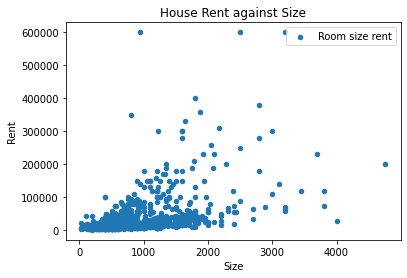

<Figure size 432x288 with 0 Axes>

In [18]:
df = training_set[['Size','Rent']]
df=df.tail(1000)
df.plot(kind='scatter',x='Size',y='Rent')
plt.title('House Rent against Size')
plt.legend(["Room size rent"])
plt.show()
plt.savefig("Exploratory Analaysis Q1.png")

2. Find average rent prices in different cities and report which city has the highest average rent

City
Bangalore    26239.562044
Chennai      21913.461871
Delhi        30329.501085
Hyderabad    20398.962428
Kolkata      11679.932558
Mumbai       84236.537676
Name: Rent, dtype: float64
Hence Mumbai city has the highest average rent: 84236.53767560664


Text(0, 0.5, 'Average Rent')

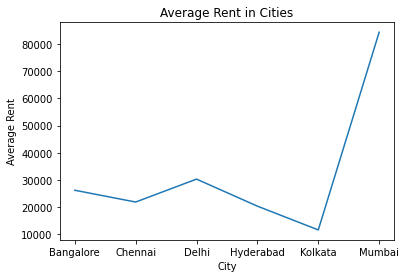

In [19]:
df1 = training_set[['Rent','City']]
avg=df1.groupby(["City"],sort=True)['Rent'].mean()
print(avg)
print("Hence Mumbai city has the highest average rent:",avg.max())
avg.plot()
plt.title("Average Rent in Cities")
plt.ylabel("Average Rent")

# Regression:

In [24]:
training_set

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1566,2022-06-23,2,16000,1100,2 out of 4,Super Area,"Jaya Nagar Block 7, Jayanagar",Bangalore,Unfurnished,Bachelors/Family,2,Contact Owner
3159,2022-05-12,2,12000,800,2 out of 3,Super Area,Manikandan Nagar,Chennai,Furnished,Bachelors/Family,2,Contact Owner
538,2022-05-10,2,28000,518,5 out of 12,Carpet Area,Bhandup West,Mumbai,Semi-Furnished,Bachelors/Family,2,Contact Owner
2630,2022-06-08,3,8000,1500,1 out of 1,Carpet Area,Cherlopalli TIRUPATI,Delhi,Unfurnished,Bachelors/Family,3,Contact Owner
4418,2022-07-06,3,46000,2235,Ground out of 10,Carpet Area,Gachibowli,Hyderabad,Unfurnished,Family,5,Contact Agent
...,...,...,...,...,...,...,...,...,...,...,...,...
1854,2022-05-11,2,8900,1100,1 out of 2,Super Area,Sarjapur Road,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
4248,2022-06-22,2,12500,1200,2 out of 5,Super Area,Kompally,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
2872,2022-05-30,2,20000,950,2 out of 3,Carpet Area,"Geeta Colony PRWS Block 3 And 7, Rajgarh Colony",Delhi,Semi-Furnished,Bachelors/Family,2,Contact Owner
3030,2022-05-12,2,14000,1000,1 out of 3,Super Area,Kanathur Reddikuppam,Chennai,Unfurnished,Bachelors/Family,2,Contact Owner


In [46]:
training_set_partition = training_set[['BHK','Rent','Bathroom']]
training_set_partition

,BHK,Rent,Bathroom
1566,2,16000,2
3159,2,12000,2
538,2,28000,2
2630,3,8000,3
4418,3,46000,5
...,...,...,...
1854,2,8900,2
4248,2,12500,2
2872,2,20000,2
3030,2,14000,2


1. Train a linear regression model on the training set partition by taking only one dependent variable of 
“size”. 

In [47]:
model = LinearRegression()
model.fit(training_set_partition,training_set['Size'])

LinearRegression()

In [52]:
training_prediction = model.predict(validation_set[['BHK','Rent','Bathroom']])
df4 = pd.DataFrame(data=training_prediction,columns=["Predicted size Values"])
df4

,Predicted size Values
0,933.096950
1,2060.994286
2,933.096950
3,2160.000592
4,1533.848348
...,...
744,1779.164458
745,2108.405122
746,1505.272395
747,1533.848348


In [56]:
df5=validation_set[['Size']]
df5

,Size
3159,800
4418,2235
4080,500
3792,2600
2323,1850
...,...
4727,214
3878,3800
2360,1400
3502,1800


In [57]:
df5Idx=df5.index.values
df4Idx=df4.index.values

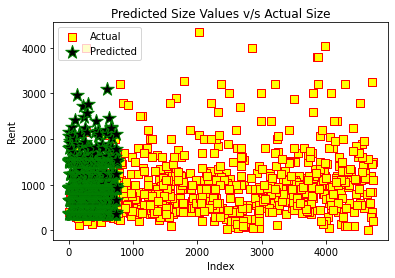

In [60]:
plt.scatter(y=df5['Size'],x=df5Idx,c="yellow",linewidths=1,marker="s",edgecolor="red",s=50)
plt.scatter(y=df4['Predicted size Values'],x=df4Idx,c="black",linewidths=1,marker="*",edgecolor="green",s=200)
plt.title("Predicted Size Values v/s Actual Size")
plt.legend(['Actual','Predicted'])
plt.xlabel("Index")
plt.ylabel("Rent")
plt.show()

2. Plot the model predictions of rent values alongside the actual rent values taken for the validation set.
Show the legend, axes and color-coded predictions and ground truth for differentiating. Calculate the error on the validation set.


In [61]:
validation_set

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
3159,2022-05-12,2,12000,800,2 out of 3,Super Area,Manikandan Nagar,Chennai,Furnished,Bachelors/Family,2,Contact Owner
4418,2022-07-06,3,46000,2235,Ground out of 10,Carpet Area,Gachibowli,Hyderabad,Unfurnished,Family,5,Contact Agent
4080,2022-06-18,2,12000,500,1 out of 2,Super Area,"Saidabad Colony, Sayeedabad",Hyderabad,Furnished,Bachelors/Family,2,Contact Owner
3792,2022-07-06,4,140000,2600,2 out of 2,Carpet Area,Ranjith Road,Chennai,Semi-Furnished,Bachelors/Family,4,Contact Agent
2323,2022-07-05,3,60000,1850,3 out of 3,Carpet Area,Halasuru,Bangalore,Furnished,Bachelors/Family,3,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4727,2022-06-28,3,30000,214,2 out of 2,Super Area,Jubilee Hills,Hyderabad,Furnished,Bachelors,4,Contact Owner
3878,2022-06-28,4,75000,3800,3 out of 10,Carpet Area,"Financial District, Nanakram Guda",Hyderabad,Semi-Furnished,Bachelors/Family,4,Contact Agent
2360,2022-05-05,3,24000,1400,2 out of 4,Super Area,"Jalahalli, Jalahalli, Outer Ring Road",Bangalore,Semi-Furnished,Bachelors/Family,3,Contact Owner
3502,2022-06-29,3,60000,1800,9 out of 9,Super Area,in Saligramam,Chennai,Semi-Furnished,Bachelors,3,Contact Agent


In [62]:
prediction = model.predict(validation_set[['BHK','Rent','Bathroom']])
df2 = pd.DataFrame(data=prediction,columns=["Predicted Rent Values"])
df2

,Predicted Rent Values
0,933.096950
1,2060.994286
2,933.096950
3,2160.000592
4,1533.848348
...,...
744,1779.164458
745,2108.405122
746,1505.272395
747,1533.848348


In [63]:
df3=validation_set[['Rent']]
df3

,Rent
3159,12000
4418,46000
4080,12000
3792,140000
2323,60000
...,...
4727,30000
3878,75000
2360,24000
3502,60000


In [64]:
df3Idx=df3.index.values
df2Idx=df2.index.values

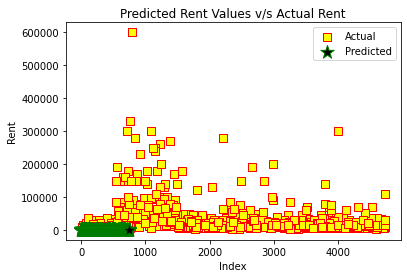

In [65]:
plt.scatter(y=df3['Rent'],x=df3Idx,c="yellow",linewidths=1,marker="s",edgecolor="red",s=50)
plt.scatter(y=df2['Predicted Rent Values'],x=df2Idx,c="black",linewidths=1,marker="*",edgecolor="green",s=200)
plt.title("Predicted Rent Values v/s Actual Rent")
plt.legend(['Actual','Predicted'])
plt.xlabel("Index")
plt.ylabel("Rent")
plt.show()

3. Create a function for calculating the RMSE values for the predictions Vs the actual ground truth rent 
values. RMSE = SQRT( Σ ( (F(xi) - yi)
2
)/N ), Here F(x) are the prediction values, N are the number of rows.

In [66]:
Validation_MSE = mean_squared_error(validation_set['Size'],prediction)
RMSE = np.sqrt(Validation_MSE)
RMSE

414.5633701366072

4. Train a logistic regression model and check the score for different training iterations. Plot the
validation results by varying max_iter as 10, 20, 30, …. 

In [67]:
training_set_partition = training_set[['BHK','Rent','Bathroom']]
training_set_partition

,BHK,Rent,Bathroom
1566,2,16000,2
3159,2,12000,2
538,2,28000,2
2630,3,8000,3
4418,3,46000,5
...,...,...,...
1854,2,8900,2
4248,2,12500,2
2872,2,20000,2
3030,2,14000,2


In [68]:
modelL = LogisticRegression(max_iter=10,solver='liblinear')
modelL.fit(training_set_partition,training_set_partition['Rent'])
modelL

C:\Users\agarw\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LogisticRegression(max_iter=10, solver='liblinear')

In [69]:
Lprediction=modelL.predict(training_set[['BHK','Size','Bathroom']])
df2 = pd.DataFrame(data=Lprediction,columns=["Predicted Rent"])
df2

,Predicted Rent
0,150000
1,150000
2,150000
3,150000
4,150000
...,...
3741,150000
3742,150000
3743,150000
3744,150000


In [70]:
mae = mean_absolute_error(training_set['Rent'],Lprediction)
mse = mean_squared_error(training_set['Rent'],Lprediction)
rmse = np.sqrt(mse)
rmse

138780.23272403193

In [71]:
from sklearn.metrics import accuracy_score
score =accuracy_score(training_set['Rent'],Lprediction)
score

0.009343299519487454

5. Try to improve accuracy (on validation set) by considering more features and retraining.

In [72]:
validation_set

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
3159,2022-05-12,2,12000,800,2 out of 3,Super Area,Manikandan Nagar,Chennai,Furnished,Bachelors/Family,2,Contact Owner
4418,2022-07-06,3,46000,2235,Ground out of 10,Carpet Area,Gachibowli,Hyderabad,Unfurnished,Family,5,Contact Agent
4080,2022-06-18,2,12000,500,1 out of 2,Super Area,"Saidabad Colony, Sayeedabad",Hyderabad,Furnished,Bachelors/Family,2,Contact Owner
3792,2022-07-06,4,140000,2600,2 out of 2,Carpet Area,Ranjith Road,Chennai,Semi-Furnished,Bachelors/Family,4,Contact Agent
2323,2022-07-05,3,60000,1850,3 out of 3,Carpet Area,Halasuru,Bangalore,Furnished,Bachelors/Family,3,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4727,2022-06-28,3,30000,214,2 out of 2,Super Area,Jubilee Hills,Hyderabad,Furnished,Bachelors,4,Contact Owner
3878,2022-06-28,4,75000,3800,3 out of 10,Carpet Area,"Financial District, Nanakram Guda",Hyderabad,Semi-Furnished,Bachelors/Family,4,Contact Agent
2360,2022-05-05,3,24000,1400,2 out of 4,Super Area,"Jalahalli, Jalahalli, Outer Ring Road",Bangalore,Semi-Furnished,Bachelors/Family,3,Contact Owner
3502,2022-06-29,3,60000,1800,9 out of 9,Super Area,in Saligramam,Chennai,Semi-Furnished,Bachelors,3,Contact Agent


In [73]:
validation_set.loc[validation_set["Area Type"] == "Super Area", "Area Type"] = 0
validation_set.loc[validation_set["Area Type"] == "Carpet Area", "Area Type"] = 1
validation_set

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
3159,2022-05-12,2,12000,800,2 out of 3,0,Manikandan Nagar,Chennai,Furnished,Bachelors/Family,2,Contact Owner
4418,2022-07-06,3,46000,2235,Ground out of 10,1,Gachibowli,Hyderabad,Unfurnished,Family,5,Contact Agent
4080,2022-06-18,2,12000,500,1 out of 2,0,"Saidabad Colony, Sayeedabad",Hyderabad,Furnished,Bachelors/Family,2,Contact Owner
3792,2022-07-06,4,140000,2600,2 out of 2,1,Ranjith Road,Chennai,Semi-Furnished,Bachelors/Family,4,Contact Agent
2323,2022-07-05,3,60000,1850,3 out of 3,1,Halasuru,Bangalore,Furnished,Bachelors/Family,3,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4727,2022-06-28,3,30000,214,2 out of 2,0,Jubilee Hills,Hyderabad,Furnished,Bachelors,4,Contact Owner
3878,2022-06-28,4,75000,3800,3 out of 10,1,"Financial District, Nanakram Guda",Hyderabad,Semi-Furnished,Bachelors/Family,4,Contact Agent
2360,2022-05-05,3,24000,1400,2 out of 4,0,"Jalahalli, Jalahalli, Outer Ring Road",Bangalore,Semi-Furnished,Bachelors/Family,3,Contact Owner
3502,2022-06-29,3,60000,1800,9 out of 9,0,in Saligramam,Chennai,Semi-Furnished,Bachelors,3,Contact Agent


In [74]:
validation_part = validation_set[['BHK','Size','Area Type','Bathroom']]
validation_part

,BHK,Size,Area Type,Bathroom
3159,2,800,0,2
4418,3,2235,1,5
4080,2,500,0,2
3792,4,2600,1,4
2323,3,1850,1,3
...,...,...,...,...
4727,3,214,0,4
3878,4,3800,1,4
2360,3,1400,0,3
3502,3,1800,0,3


In [75]:
modelL = LogisticRegression(max_iter=20,solver='liblinear')
modelL.fit(validation_part,validation_set['Rent'])
modelL

C:\Users\agarw\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LogisticRegression(max_iter=20, solver='liblinear')

In [76]:
Lprediction=modelL.predict(validation_set[['BHK','Size','Area Type','Bathroom']])
df2 = pd.DataFrame(data=Lprediction,columns=["Predicted Rent"])
df2

,Predicted Rent
0,12000
1,150000
2,12000
3,30000
4,30000
...,...
744,190000
745,70000
746,15000
747,20000


In [77]:
mae = mean_absolute_error(validation_set['Rent'],Lprediction)
mse = mean_squared_error(validation_set['Rent'],Lprediction)
rmse = np.sqrt(mse)
rmse

53868.23320582323

In [78]:
score =accuracy_score(validation_set['Rent'],Lprediction)
score

0.08945260347129506

In [79]:
validation_set.loc[validation_set["Furnishing Status"] == "Furnished", "Furnishing Status"] = 0
validation_set.loc[validation_set["Furnishing Status"] == "Unfurnished", "Furnishing Status"] = 1
validation_set.loc[validation_set["Furnishing Status"] == "Semi-Furnished", "Furnishing Status"] = 2
validation_set

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
3159,2022-05-12,2,12000,800,2 out of 3,0,Manikandan Nagar,Chennai,0,Bachelors/Family,2,Contact Owner
4418,2022-07-06,3,46000,2235,Ground out of 10,1,Gachibowli,Hyderabad,1,Family,5,Contact Agent
4080,2022-06-18,2,12000,500,1 out of 2,0,"Saidabad Colony, Sayeedabad",Hyderabad,0,Bachelors/Family,2,Contact Owner
3792,2022-07-06,4,140000,2600,2 out of 2,1,Ranjith Road,Chennai,2,Bachelors/Family,4,Contact Agent
2323,2022-07-05,3,60000,1850,3 out of 3,1,Halasuru,Bangalore,0,Bachelors/Family,3,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4727,2022-06-28,3,30000,214,2 out of 2,0,Jubilee Hills,Hyderabad,0,Bachelors,4,Contact Owner
3878,2022-06-28,4,75000,3800,3 out of 10,1,"Financial District, Nanakram Guda",Hyderabad,2,Bachelors/Family,4,Contact Agent
2360,2022-05-05,3,24000,1400,2 out of 4,0,"Jalahalli, Jalahalli, Outer Ring Road",Bangalore,2,Bachelors/Family,3,Contact Owner
3502,2022-06-29,3,60000,1800,9 out of 9,0,in Saligramam,Chennai,2,Bachelors,3,Contact Agent


In [80]:
validation_part = validation_set[['BHK','Size','Area Type','Furnishing Status','Bathroom']]
validation_part

,BHK,Size,Area Type,Furnishing Status,Bathroom
3159,2,800,0,0,2
4418,3,2235,1,1,5
4080,2,500,0,0,2
3792,4,2600,1,2,4
2323,3,1850,1,0,3
...,...,...,...,...,...
4727,3,214,0,0,4
3878,4,3800,1,2,4
2360,3,1400,0,2,3
3502,3,1800,0,2,3


In [81]:
modelL = LogisticRegression(max_iter=20,solver='liblinear')
modelL.fit(validation_part,validation_set['Rent'])
modelL

C:\Users\agarw\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LogisticRegression(max_iter=20, solver='liblinear')

In [82]:
Lprediction=modelL.predict(validation_set[['BHK','Size','Area Type','Furnishing Status','Bathroom']])
df2 = pd.DataFrame(data=Lprediction,columns=["Predicted Rent"])
df2

,Predicted Rent
0,15000
1,45000
2,12000
3,30000
4,30000
...,...
744,190000
745,70000
746,20000
747,20000


In [83]:
mae = mean_absolute_error(validation_set['Rent'],Lprediction)
mse = mean_squared_error(validation_set['Rent'],Lprediction)
rmse = np.sqrt(mse)
rmse

51491.80777893824

In [84]:
score =accuracy_score(validation_set['Rent'],Lprediction)
score

0.10146862483311081

6. Make predictions on the test set by taking 3 of your best models. Report these 3 accuracy values

In [85]:
testing_prediction_partition = testing_set[['BHK','Rent','Bathroom']]
testing_prediction_partition

,BHK,Rent,Bathroom
2467,3,40000,2
1645,2,12000,2
3417,2,5000,2
3476,3,10000,3
3941,4,25000,3
...,...,...,...
4426,3,25000,3
466,3,20000,2
3092,2,20000,2
3772,3,85000,3


In [86]:
modelL = LogisticRegression(max_iter=10,solver='liblinear')
modelL.fit(testing_prediction_partition,testing_prediction_partition['Rent'])
modelL

C:\Users\agarw\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LogisticRegression(max_iter=10, solver='liblinear')

In [87]:
Lprediction=modelL.predict(testing_set[['BHK','Size','Bathroom']])
df2 = pd.DataFrame(data=Lprediction,columns=["Predicted Rent"])
df2

,Predicted Rent
0,150000
1,150000
2,150000
3,150000
4,150000
...,...
995,150000
996,150000
997,150000
998,150000


In [88]:
mae = mean_absolute_error(testing_set['Rent'],Lprediction)
mse = mean_squared_error(testing_set['Rent'],Lprediction)
rmse = np.sqrt(mse)
rmse

145301.5670941095

In [89]:
score =accuracy_score(testing_set['Rent'],Lprediction)
score

0.008